In [41]:
import networkx as nx
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
import scipy.stats as stats
import scipy.special as special
import powerlaw
import numpy as np

In [5]:
# Load the datasets from the assignment_1_data folder
path = "Assignment_02_data/"
files = [f for f in listdir(path) if isfile(join(path, f))]
gmls = [nx.read_gml(path + f) for f in files]

graphs = {k: v for k, v in zip(files, gmls)}

In [53]:
# Compute the exponent γ of the power-law distribution fit p(k) ∼ k^−γ of the network degree distribution and the corresponding error.

degrees = {k: [v.degree(n) for n in v.nodes()] for k, v in graphs.items()}

powerlaws = {k: powerlaw.Fit(v) for k, v in degrees.items()}

for k, v in powerlaws.items():
    print(f"dataset: {k}, gamma: {v.power_law.alpha}, error: {v.power_law.sigma}")

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
dataset: graph_eu_airlines.gml, gamma: 2.2048967561716686, error: 0.10864188179492826
dataset: graph_hep-th.gml, gamma: 3.2578297967826777, error: 0.06345624178780455
dataset: graph_internet.gml, gamma: 2.112191339113011, error: 0.0366878070312722
dataset: graph_macaque.gml, gamma: 17.04488902994108, error: 4.01122225748527
dataset: graph_starwars.gml, gamma: 4.676151779634649, error: 1.2997159260253275


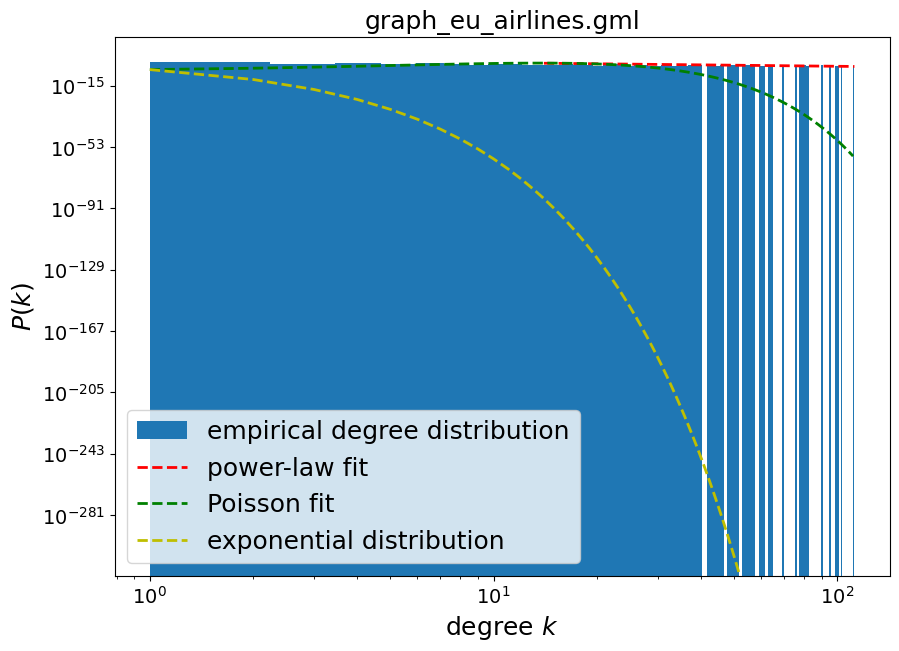

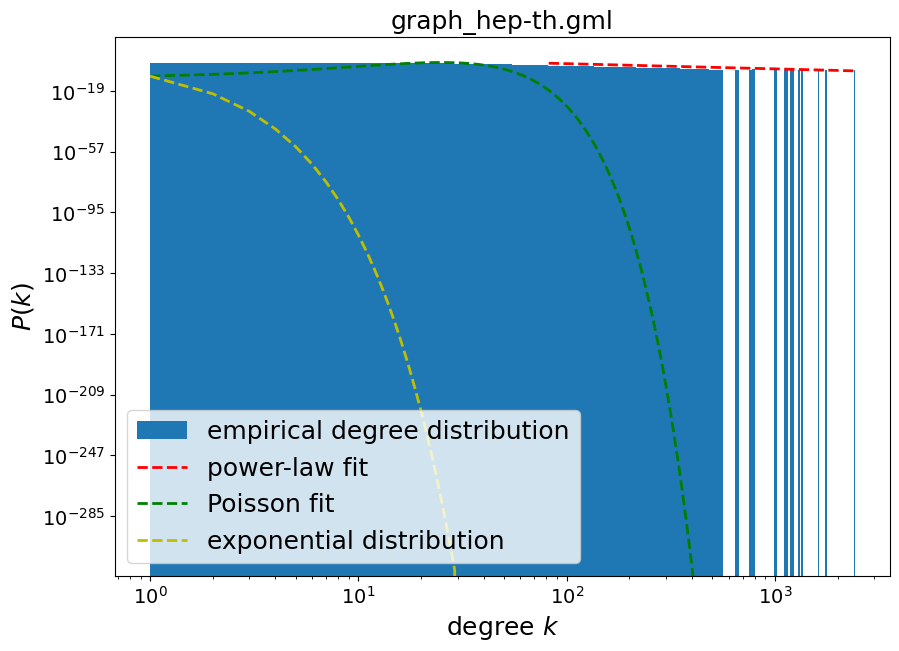

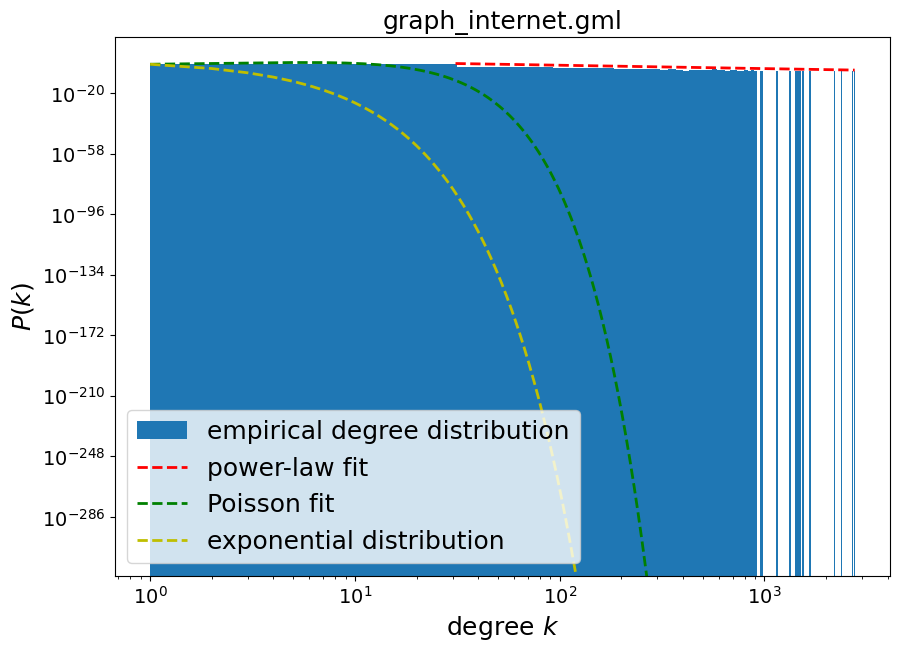

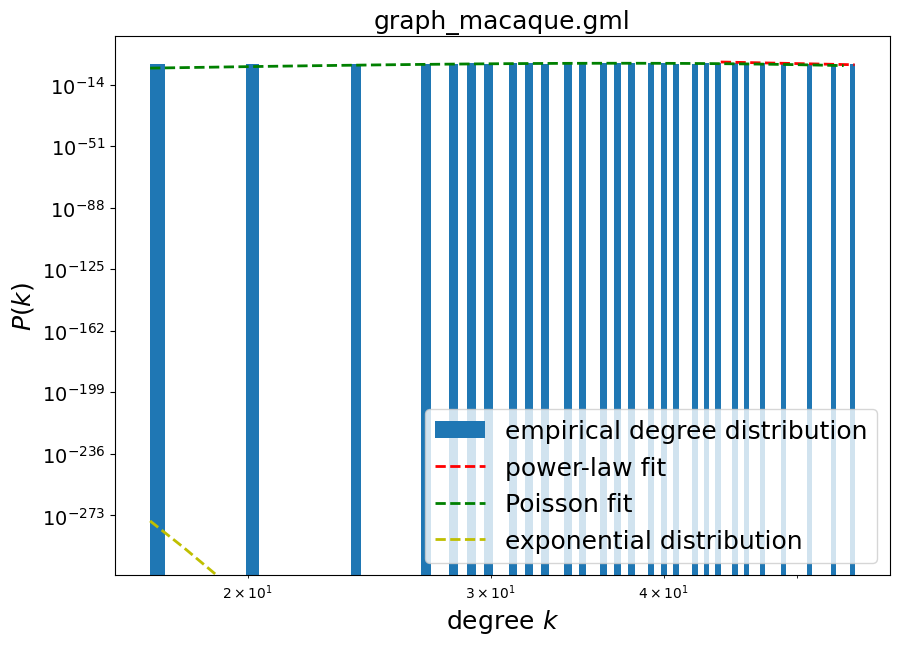

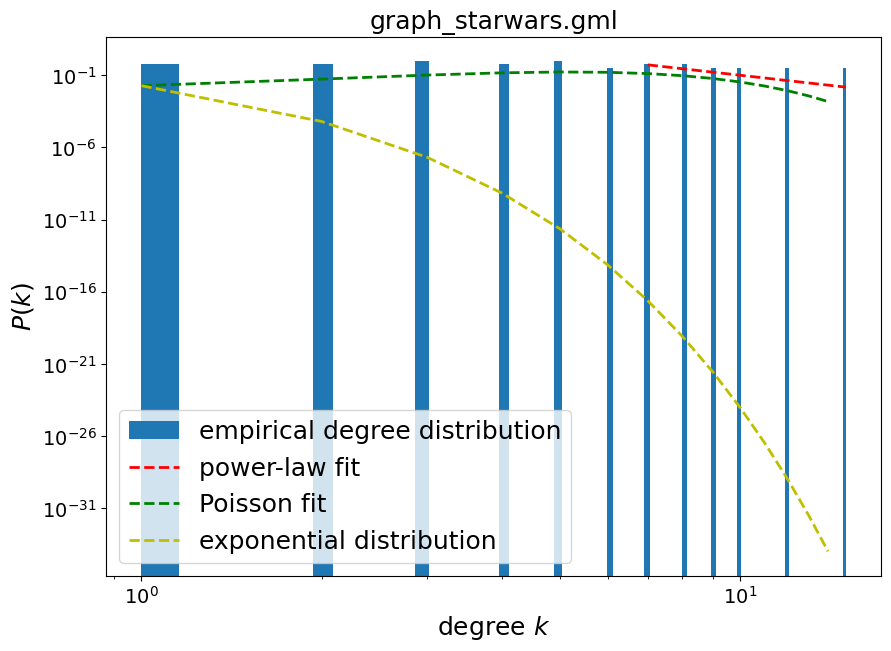

In [55]:
# Produce a single plot showing:
# • the empirical degree distribution,
# • the power-law fit,
# • the Poisson fit,
# • the exponential distribution with mean value equal to ⟨k⟩.

from collections import Counter 


for k, v in degrees.items():
    fig = plt.figure(figsize=(10,7))
    plt.title(k, fontsize=18)    
    plt.hist(v, bins=90, density=True, log=True, histtype='stepfilled')
    powerlaws[k].power_law.plot_pdf(color='r', linestyle='--', linewidth=2)

    # Poisson fit
    l = np.mean(v)
    x = np.arange(min(v), max(v))
    plt.plot(x, stats.poisson.pmf(x, l), 'g--', linewidth=2)

    # Exponential fit
    plt.plot(x, stats.expon.pdf(x, scale=1/l), 'y--', linewidth=2)

    plt.xlabel('degree $k$', fontsize=18)
    plt.ylabel('$P(k)$', fontsize=18)

    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

    plt.yscale('log')
    plt.xscale('log')
    #plt.axis([1,1000,0.00001,0.2])
    plt.legend(['empirical degree distribution', 'power-law fit', 'Poisson fit', 'exponential distribution' ], fontsize=18)
    plt.show()